<a href="https://colab.research.google.com/github/jahangirBuet/Evolutionary_Algorithm/blob/main/2_Correlation_of_attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score , auc
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score , auc
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Final Research Work/CODE/Tonsil_updatedata.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       4807 non-null   object 
 1   Race recode                               4807 non-null   object 
 2   Year of diagnosis                         4807 non-null   int64  
 3   Sex                                       4807 non-null   object 
 4   Primary Site  labeled                     4807 non-null   object 
 5   ICD-O-3 Hist behav                        4807 non-null   object 
 6   Laterality                                4807 non-null   object 
 7   Site recode - rare tumors                 4807 non-null   object 
 8   AYA site recode                           4807 non-null   object 
 9   Derived AJCC T                            4807 non-null   object 
 10  Derived AJCC N                      

In [ ]:
df.describe()

,Year of diagnosis,RX Summ--Surg Prim Site,Regional nodes examined,CS tumor size,CS extension,CS lymph nodes,CS mets at dx,Survival months,Total number of benign tumors,Total number of malignant tumor,Histology ICD-O-2,Regional nodes positive,Patient ID
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4.807000e+03
mean,2010.576035,17.118369,28.568754,268.460994,353.316414,190.759101,3.422925,82.428958,0.004369,1.274392,8070.519659,61.592053,1.602947e+07
std,3.292381,16.706044,37.229532,418.593573,214.270957,185.044568,16.805942,44.864918,0.071991,0.605681,19.242100,46.033684,9.547912e+06
min,2004.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8000.000000,0.000000,1.026070e+05
25%,2008.000000,0.000000,0.000000,20.000000,150.000000,100.000000,0.000000,48.000000,0.000000,1.000000,8070.000000,2.000000,6.363275e+06
50%,2011.000000,27.000000,5.000000,32.000000,300.000000,190.000000,0.000000,77.000000,0.000000,1.000000,8070.000000,95.000000,1.779194e+07
75%,2013.000000,31.000000,47.500000,101.000000,500.000000,220.000000,0.000000,115.000000,0.000000,1.000000,8070.000000,98.000000,2.400173e+07
max,2015.000000,99.000000,99.000000,999.000000,999.000000,999.000000,99.000000,179.000000,2.000000,8.000000,8560.000000,99.000000,3.062042e+07


In [ ]:
df1=df

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1=df1.drop(
    [
     'Patient ID',
     'Diagnostic Confirmation',
     'Combined Summary Stage',
     'Behavior code ICD-O-2',
     'SEER cause-specific death classification',
     'Survival months',
     'AYA site recode ',
     'Year of diagnosis',
     'Race recode'





    ],axis=1

)

In [ ]:
df1.shape

(4807, 28)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4807 entries, 0 to 4806
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4807 non-null   object 
 1   Sex                                  4807 non-null   object 
 2   Primary Site  labeled                4807 non-null   object 
 3   ICD-O-3 Hist behav                   4807 non-null   object 
 4   Laterality                           4807 non-null   object 
 5   Site recode - rare tumors            4807 non-null   object 
 6   Derived AJCC T                       4807 non-null   object 
 7   Derived AJCC N                       4807 non-null   object 
 8   Derived AJCC M                       4807 non-null   object 
 9   RX Summ--Surg Prim Site              4807 non-null   int64  
 10  RX Summ--Surg Oth Reg                4807 non-null   object 
 11  Reason no cancer - directed su

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [ ]:
df3=df1.drop(

[
 'Age', 'Sex', 'Primary Site  labeled', 'ICD-O-3 Hist behav',
       'Laterality', 'Site recode - rare tumors', 'Derived AJCC T',
       'Derived AJCC N', 'Derived AJCC M',
       'RX Summ--Surg Oth Reg', 'Reason no cancer - directed surgery',
       'Vital status recode',

       'Race and origin recode',  'Grade', 'Histology recode  broad groupings',
       'SEER Combined Summary Stage', 'Derived AJCC Stage Group',
       'RX Summ--Scope Reg LN Sur'




],axis=1


)

In [ ]:
df2=df1[[
         'Age', 'Sex', 'Primary Site  labeled', 'ICD-O-3 Hist behav',
       'Laterality', 'Site recode - rare tumors', 'Derived AJCC T',
       'Derived AJCC N', 'Derived AJCC M',
       'RX Summ--Surg Oth Reg', 'Reason no cancer - directed surgery',
       'Vital status recode',

       'Race and origin recode',  'Grade', 'Histology recode  broad groupings',
       'SEER Combined Summary Stage', 'Derived AJCC Stage Group',
       'RX Summ--Scope Reg LN Sur'



]]


In [ ]:
df2=df2.apply(LabelEncoder().fit_transform)

In [ ]:
df4=pd.concat([df2,df3],axis=1)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4807 entries, 0 to 4806
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4807 non-null   int64  
 1   Sex                                  4807 non-null   int64  
 2   Primary Site  labeled                4807 non-null   int64  
 3   ICD-O-3 Hist behav                   4807 non-null   int64  
 4   Laterality                           4807 non-null   int64  
 5   Site recode - rare tumors            4807 non-null   int64  
 6   Derived AJCC T                       4807 non-null   int64  
 7   Derived AJCC N                       4807 non-null   int64  
 8   Derived AJCC M                       4807 non-null   int64  
 9   RX Summ--Surg Oth Reg                4807 non-null   int64  
 10  Reason no cancer - directed surgery  4807 non-null   int64  
 11  Vital status recode           

# Correlation

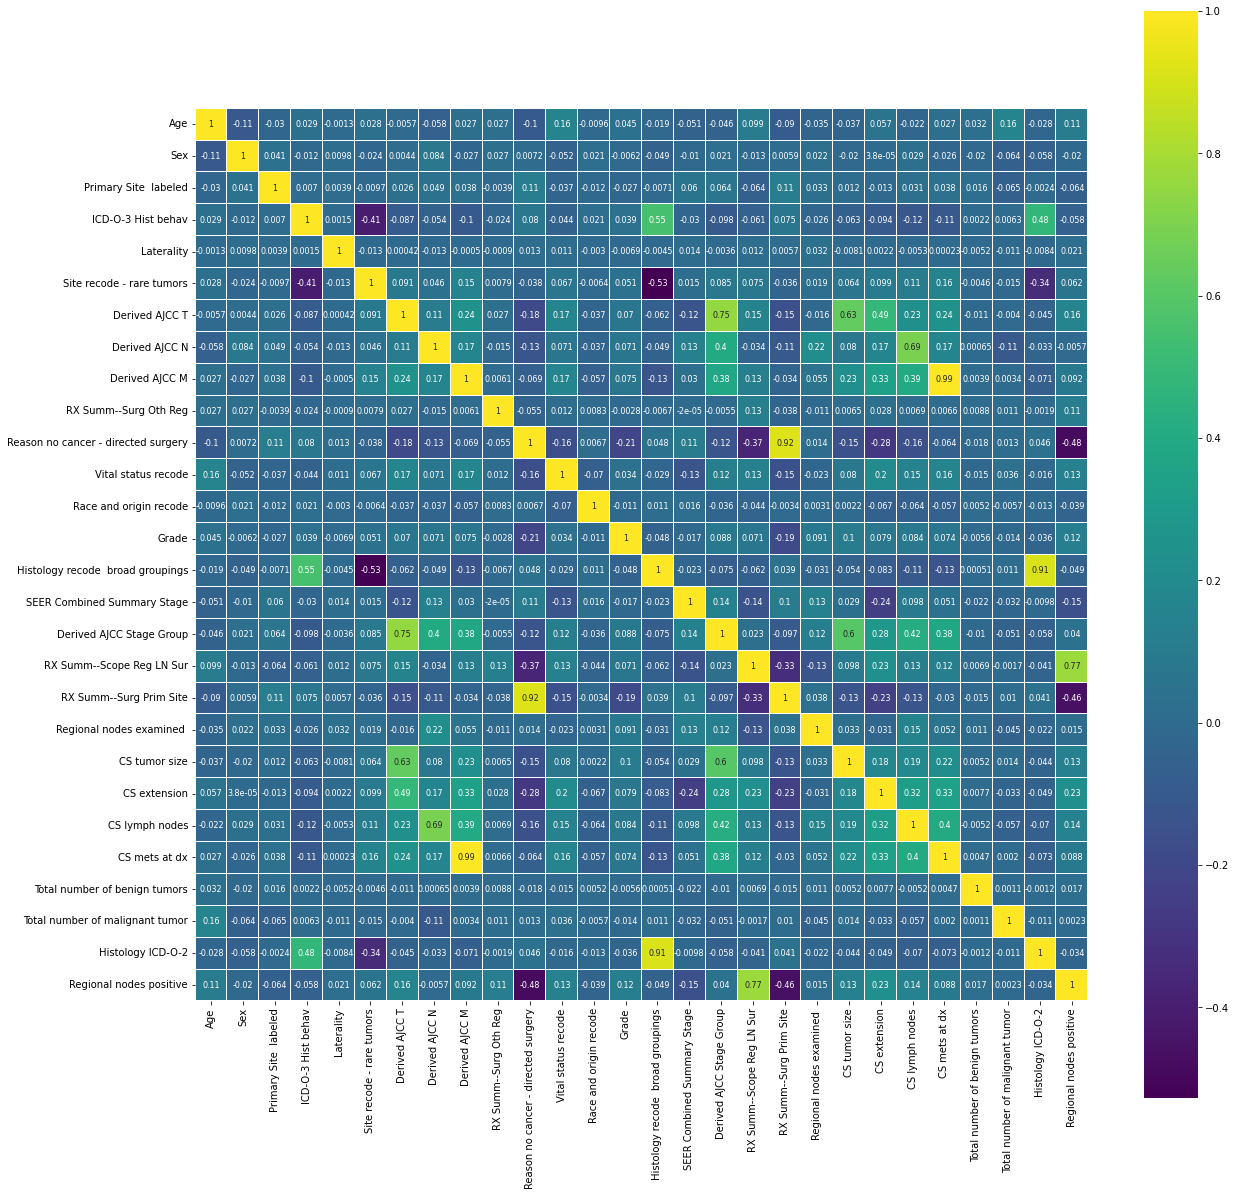

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df4[top_corr_features].corr(), linewidths=0.01,square=True,annot=True,cmap="viridis",annot_kws={"size": 8})

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df4, 0.8)
len(set(corr_features))

3

In [ ]:
corr_features

{'CS mets at dx', 'Histology ICD-O-2', 'RX Summ--Surg Prim Site'}

In [ ]:
#  { 'CS mets at dx' 'Histology ICD-O-2' 'RX Summ--Surg Prim Site'}

In [ ]:
df4.columns

Index(['Age', 'Sex', 'Primary Site  labeled', 'ICD-O-3 Hist behav',
       'Laterality', 'Site recode - rare tumors', 'Derived AJCC T',
       'Derived AJCC N', 'Derived AJCC M', 'RX Summ--Surg Oth Reg',
       'Reason no cancer - directed surgery', 'Vital status recode',
       'Race and origin recode', 'Grade', 'Histology recode  broad groupings',
       'SEER Combined Summary Stage', 'Derived AJCC Stage Group',
       'RX Summ--Scope Reg LN Sur', 'RX Summ--Surg Prim Site',
       'Regional nodes examined ', 'CS tumor size', 'CS extension',
       'CS lymph nodes', 'CS mets at dx', 'Total number of benign tumors',
       'Total number of malignant tumor', 'Histology ICD-O-2',
       'Regional nodes positive'],
      dtype='object')

In [ ]:
colll=['Derived AJCC Stage Group','Derived AJCC M','Histology recode  broad groupings',  'RX Summ--Scope Reg LN Sur','Derived AJCC T', 'Vital status recode','RX Summ--Surg Prim Site','CS mets at dx','Histology ICD-O-2','Regional nodes positive','Reason no cancer - directed surgery',]

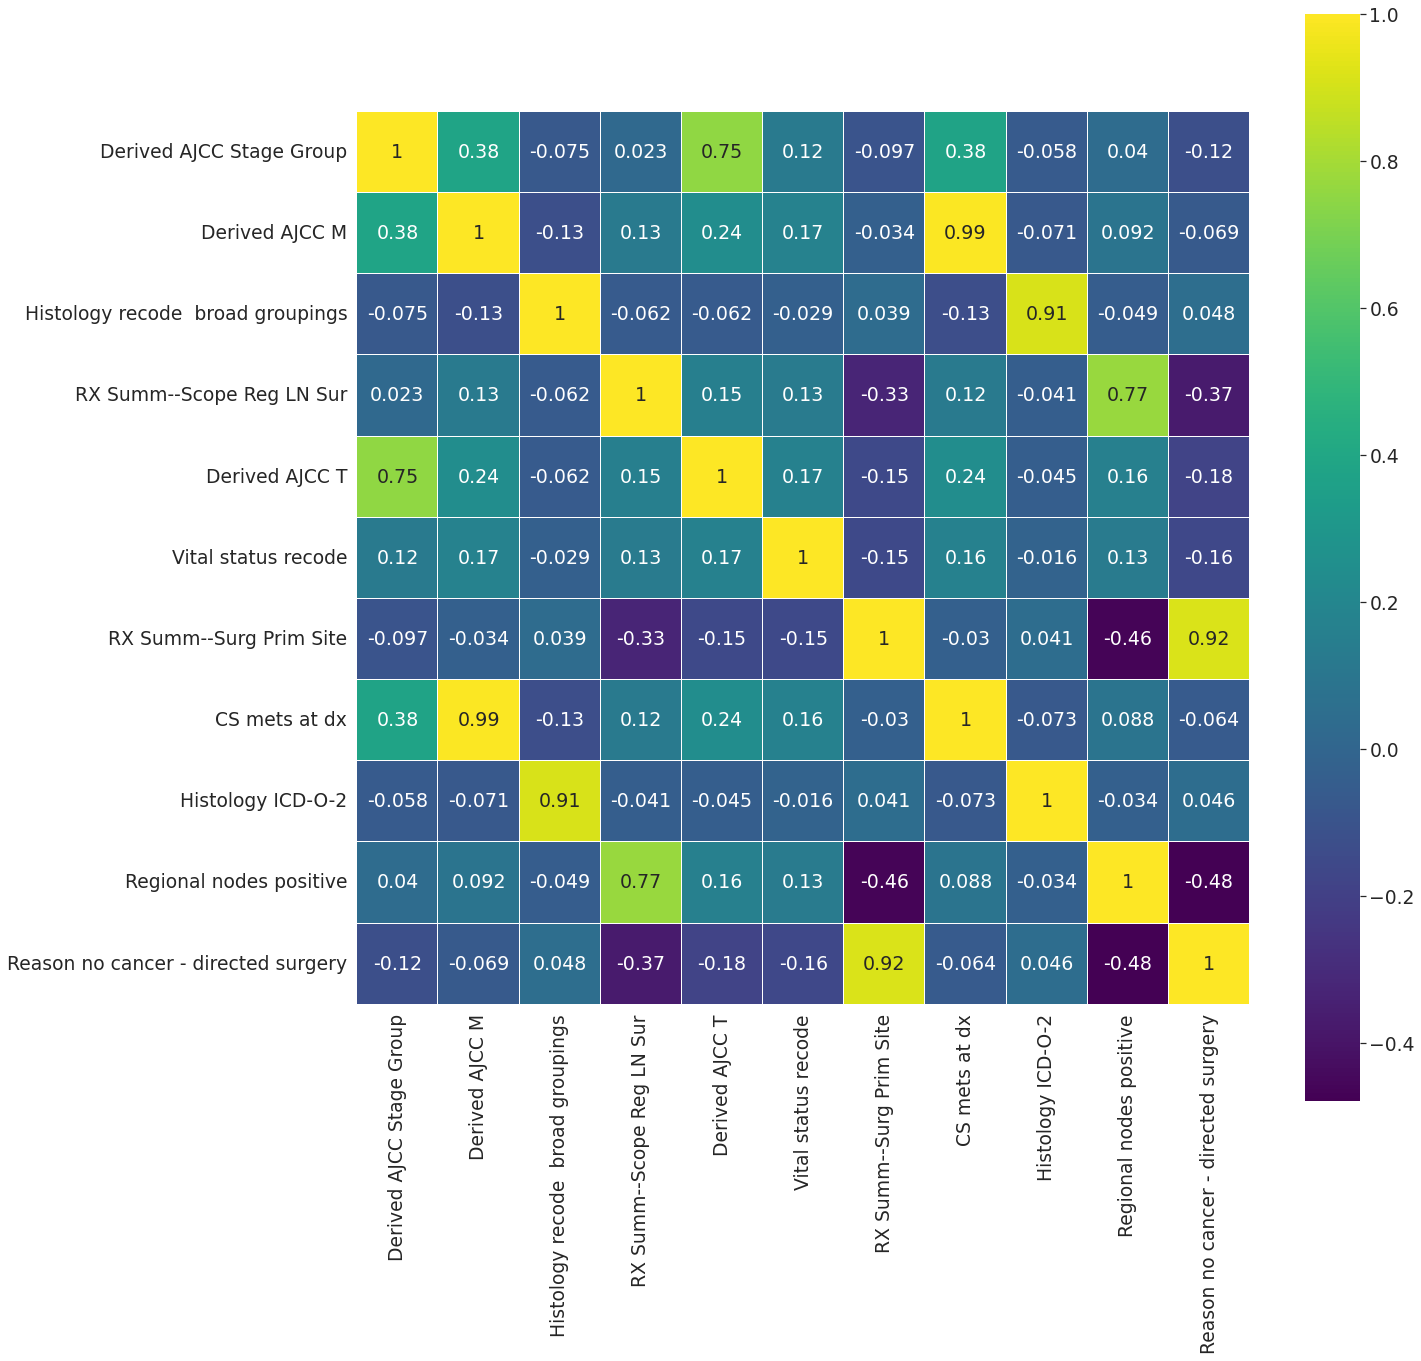

In [ ]:
corrmat = df4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.set(font_scale=1.7)
g=sns.heatmap(df4[colll].corr(), linewidths=0.01,square=True,annot=True,cmap="viridis",annot_kws={"size": 19})